In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

df = pd.read_csv('../Datasets/phishing_website_data.csv')

PRE-PROCESSING

Based on the distribution of the URL and Domain lengths in the EDA, we remove the outliers.

In [2]:
filtered_data = df[(df['URLLength'] < 1200) & (df['DomainLength'] < 60)]

In [3]:
pd.set_option('display.max_columns', None) # Printing all the columns, not truncating them.
filtered_data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,2.335190e+05,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000,233519.000000
mean,33.720871,20.960641,0.002732,79.096949,0.851000,0.261495,0.055929,2.757095,1.155032,0.001906,0.016226,0.000132,18.779281,0.513902,1.716507,0.027689,0.056295,0.028023,0.021664,2.285433,0.063280,0.782506,1151.482539,1.186199e+04,0.863463,50.618554,52.628871,0.364591,0.267760,0.628137,0.132015,0.040451,0.444135,0.223781,1.601155,0.044386,0.460973,0.415204,0.379451,0.100180,0.127784,0.237874,0.023664,0.490431,26.322980,6.387964,10.607706,65.703930,2.398897,49.730793,0.577469
std,29.867335,7.562420,0.052198,28.314320,0.210090,0.251554,0.010459,0.594271,0.591032,0.043612,0.509149,0.003774,21.763120,0.121931,7.409788,0.070294,0.558241,0.190142,0.581887,2.774256,0.032384,0.412542,3434.998858,1.496593e+05,0.343359,49.671189,49.573625,0.481316,0.442793,0.483303,0.338508,0.197014,0.496870,3.889134,5.788537,0.205952,0.498476,0.492758,0.485251,0.300241,0.333850,0.425782,0.152000,0.499909,79.757924,75.228051,22.401729,177.429616,17.725232,161.739857,0.493963
min,13.000000,4.000000,0.000000,0.702797,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,58.131488,0.692308,0.006411,0.051065,2.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,20.000000,2.020000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058063,3.000000,1.000000,0.000000,0.000000,0.000000,14.000000,0.518000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,440.000000,1.090000e+03,1.000000,83.333333,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,14.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062926,3.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.0000

Displaying distribution of Data in different Features to Spot Outliers.

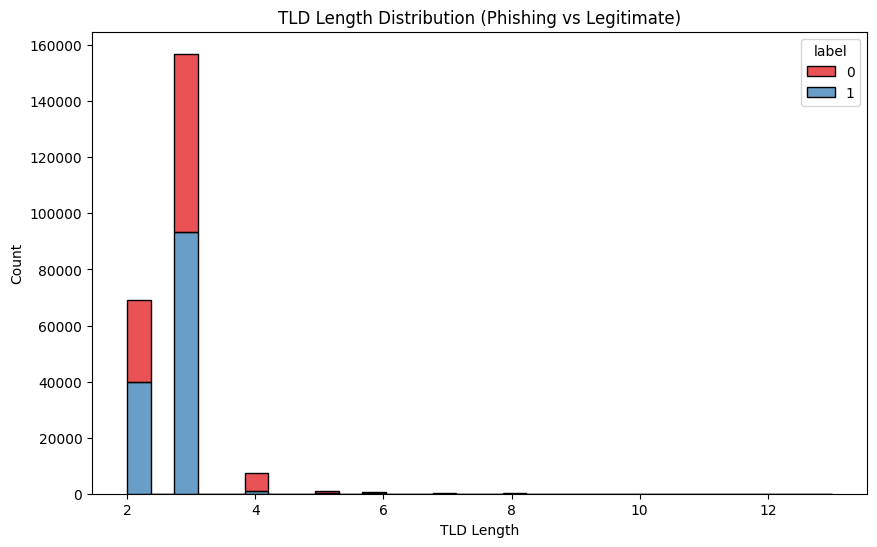

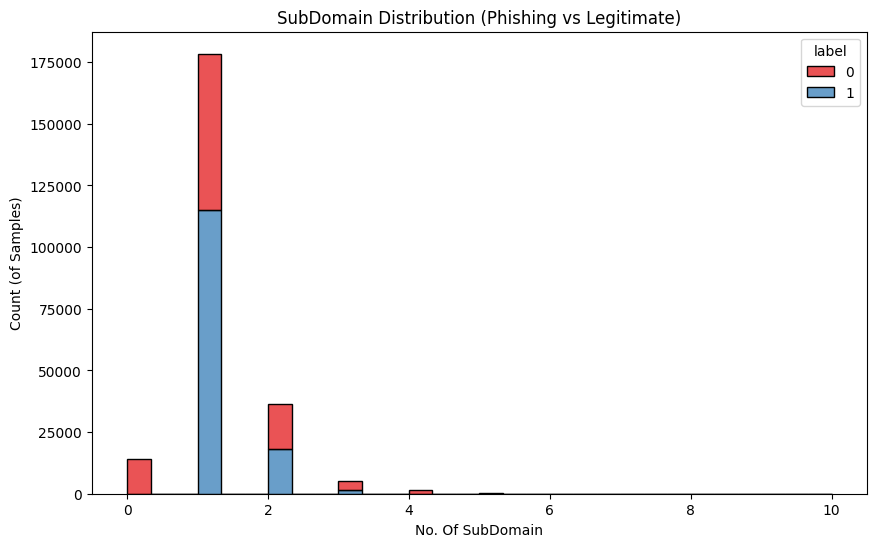

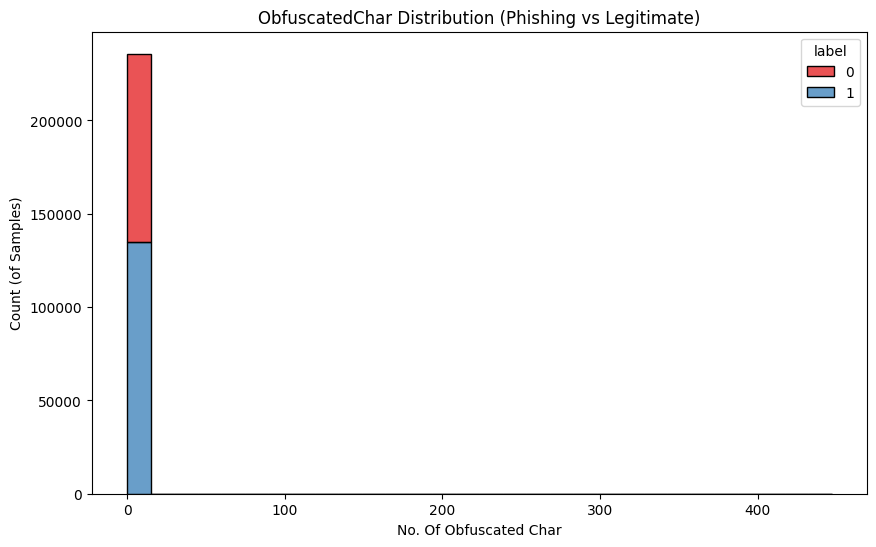

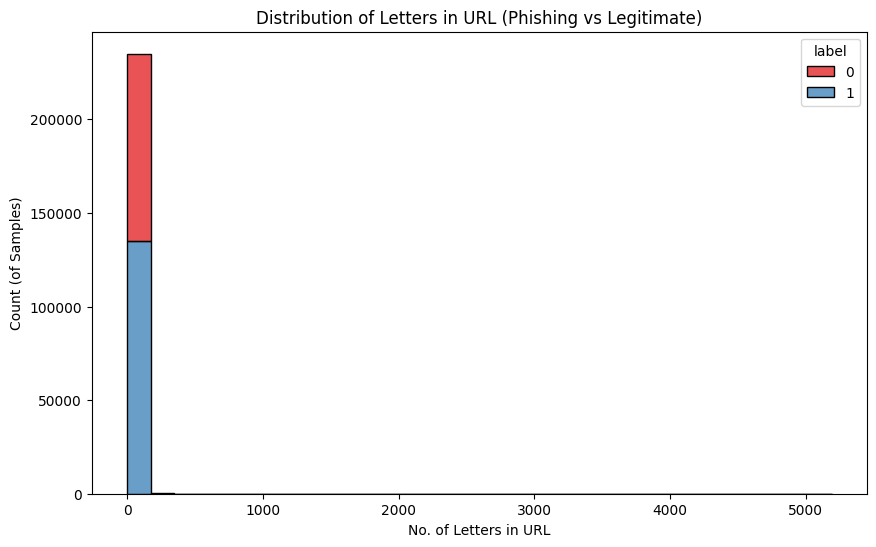

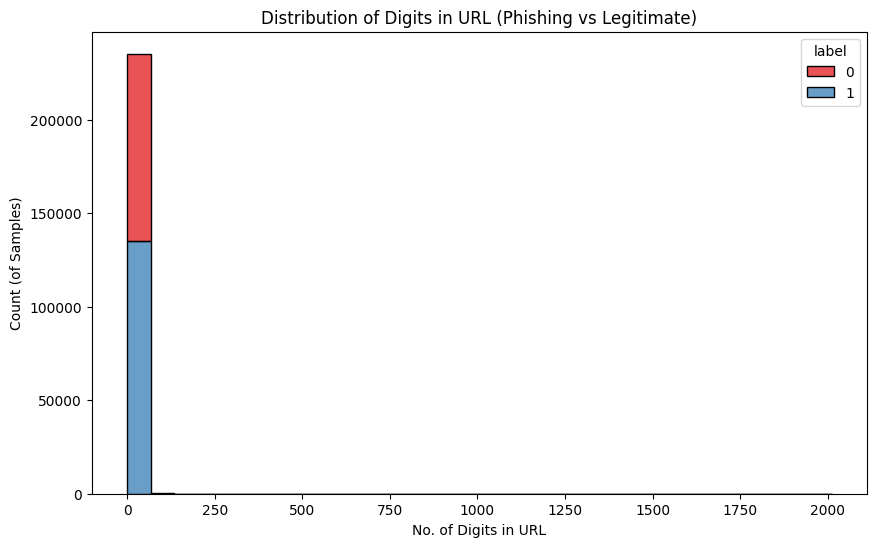

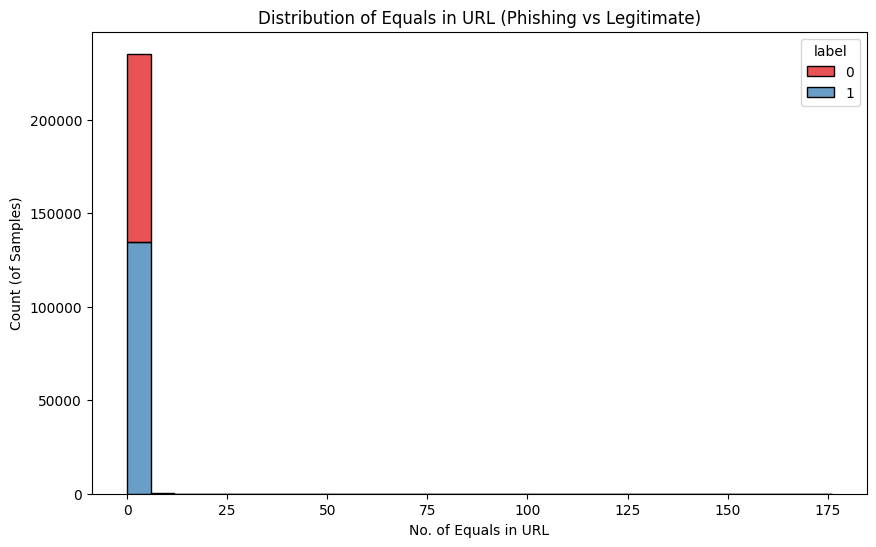

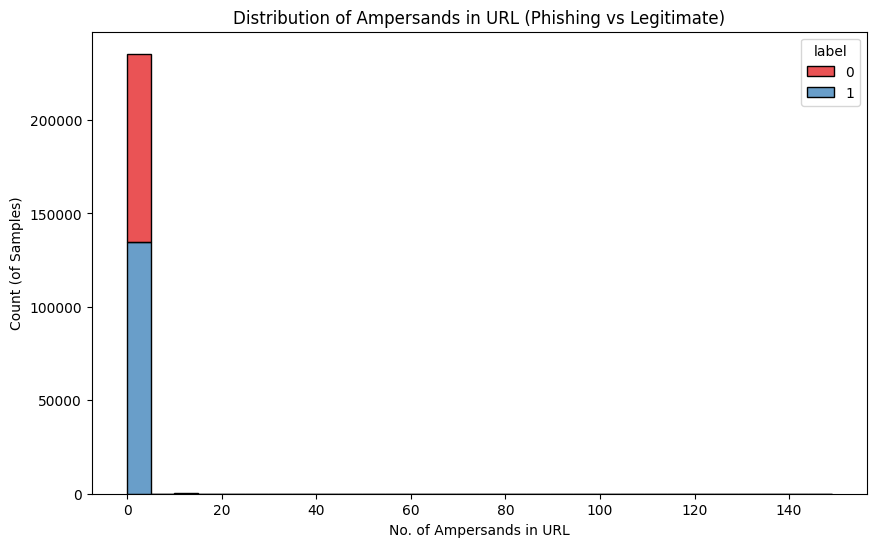

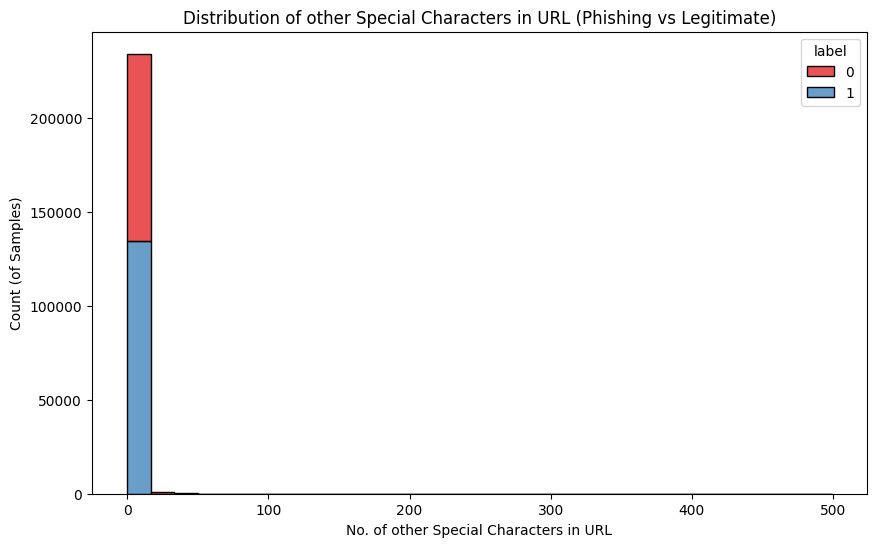

In [4]:
# TLD Length Distribution based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='TLDLength', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('TLD Length Distribution (Phishing vs Legitimate)')
plt.xlabel('TLD Length')
plt.ylabel('Count')
plt.show()

# SubDomain Distribution Distribution based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfSubDomain', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('SubDomain Distribution (Phishing vs Legitimate)')
plt.xlabel('No. Of SubDomain')
plt.ylabel('Count (of Samples)')
plt.show()

# ObfuscatedChar Distribution based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfObfuscatedChar', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('ObfuscatedChar Distribution (Phishing vs Legitimate)')
plt.xlabel('No. Of Obfuscated Char')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution of Letters in URL based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfLettersInURL', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of Letters in URL (Phishing vs Legitimate)')
plt.xlabel('No. of Letters in URL')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution of Digits in URL based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfDegitsInURL', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of Digits in URL (Phishing vs Legitimate)')
plt.xlabel('No. of Digits in URL')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution of Equals in URL based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfEqualsInURL', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of Equals in URL (Phishing vs Legitimate)')
plt.xlabel('No. of Equals in URL')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution of Ampersand in URL based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfAmpersandInURL', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of Ampersands in URL (Phishing vs Legitimate)')
plt.xlabel('No. of Ampersands in URL')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution of Other Special Characters in URL based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfOtherSpecialCharsInURL', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution of other Special Characters in URL (Phishing vs Legitimate)')
plt.xlabel('No. of other Special Characters in URL')
plt.ylabel('Count (of Samples)')
plt.show()

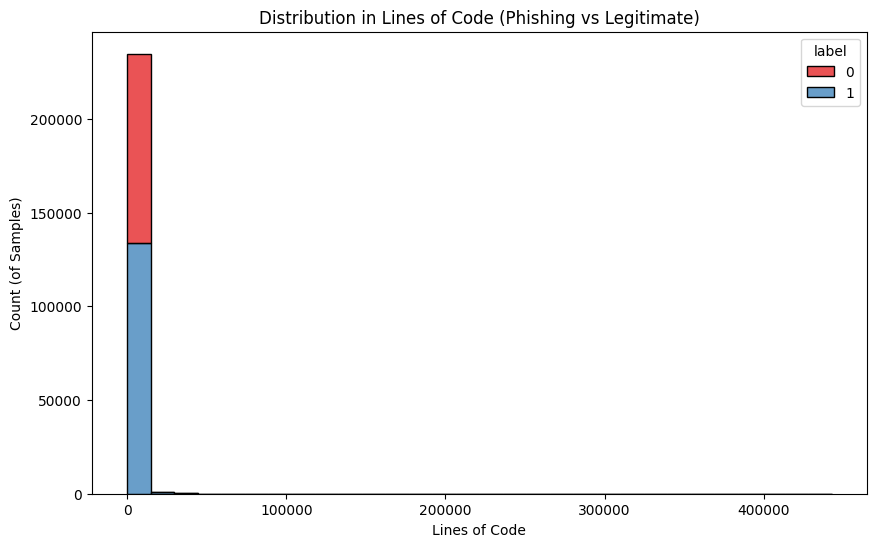

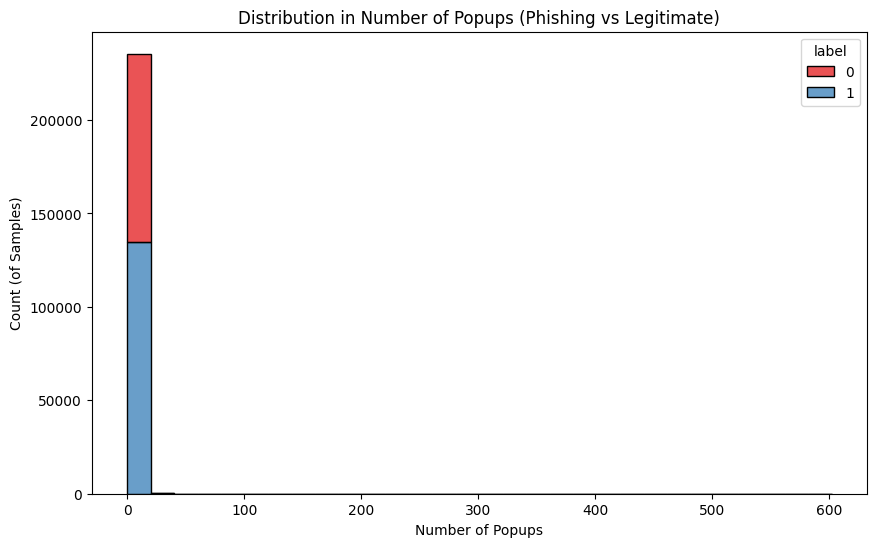

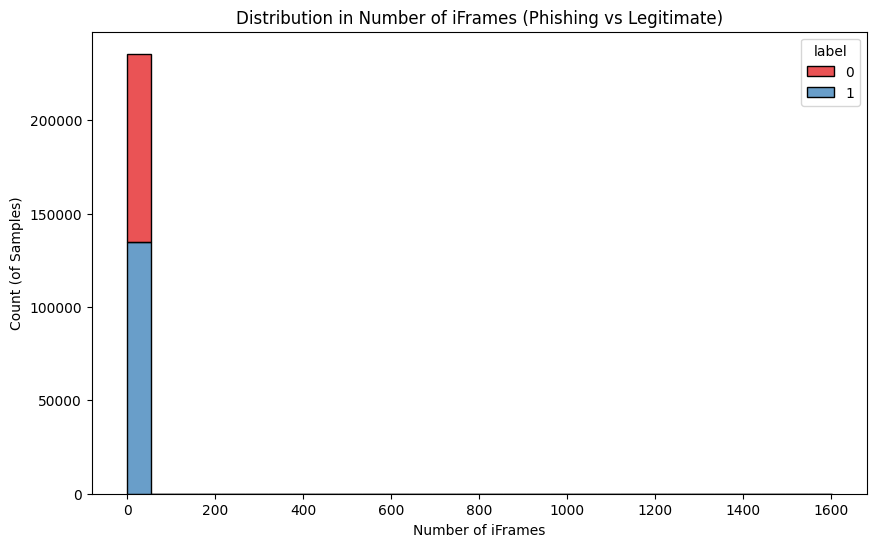

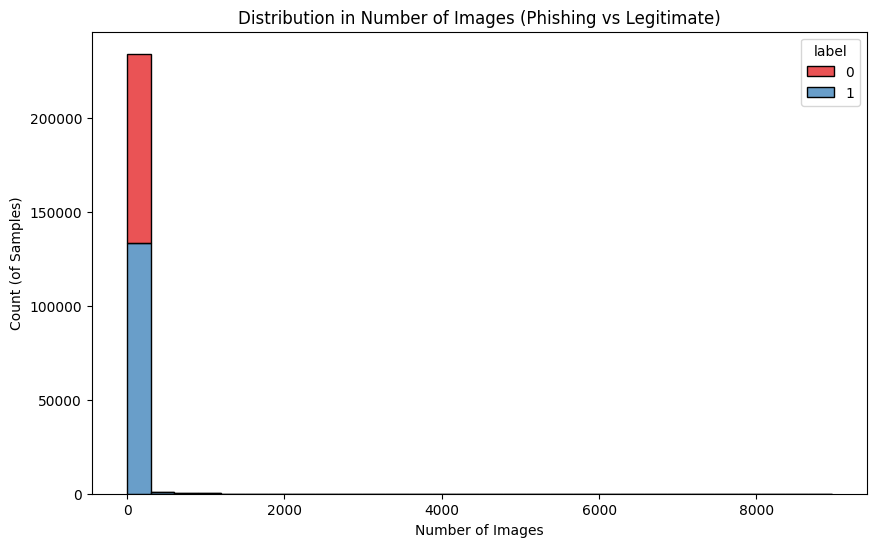

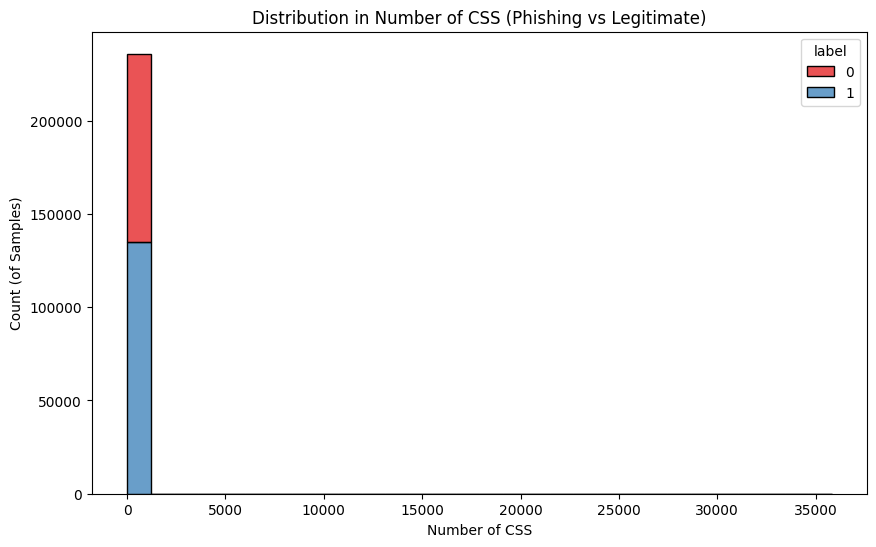

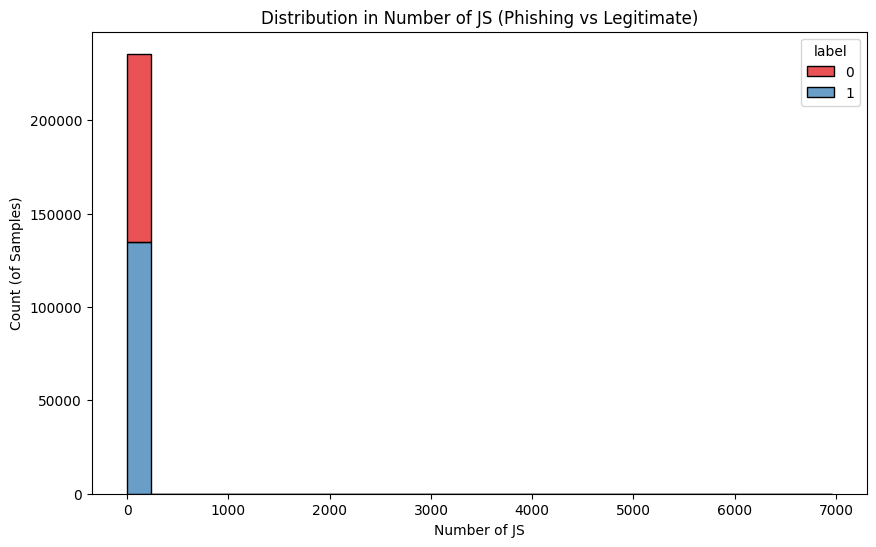

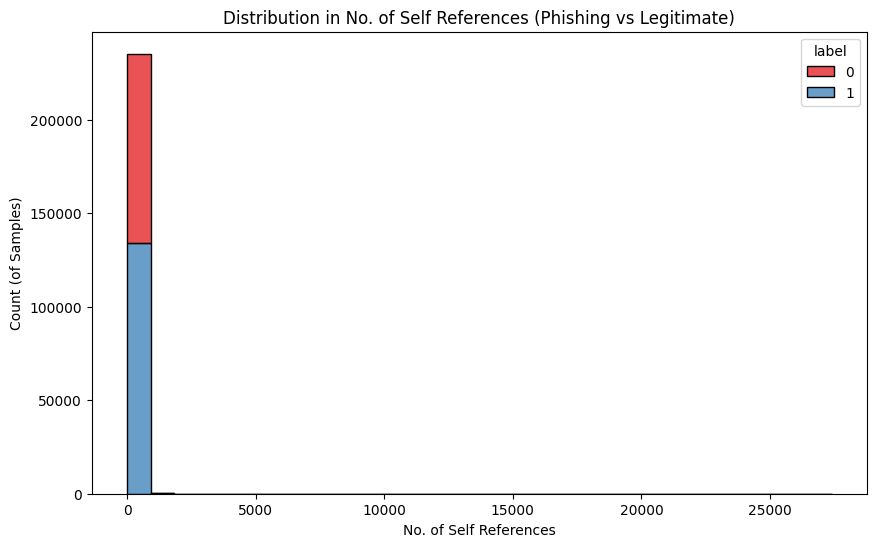

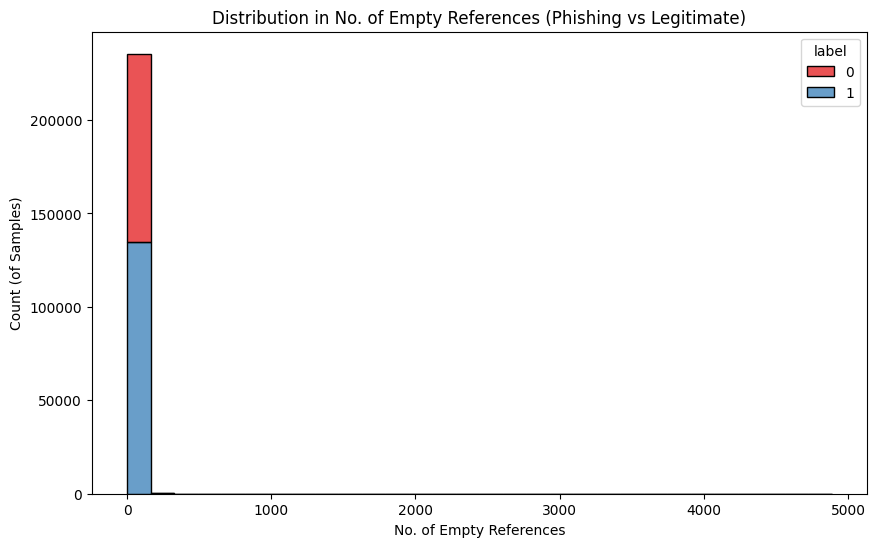

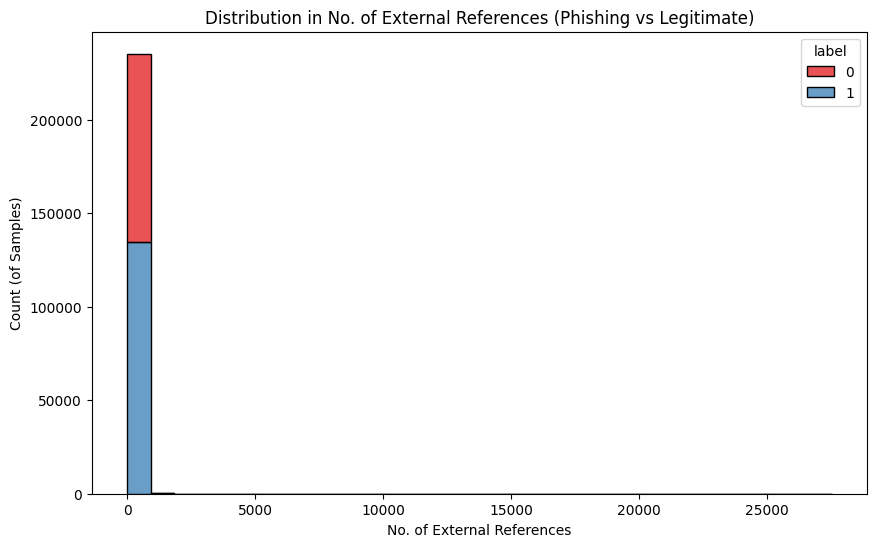

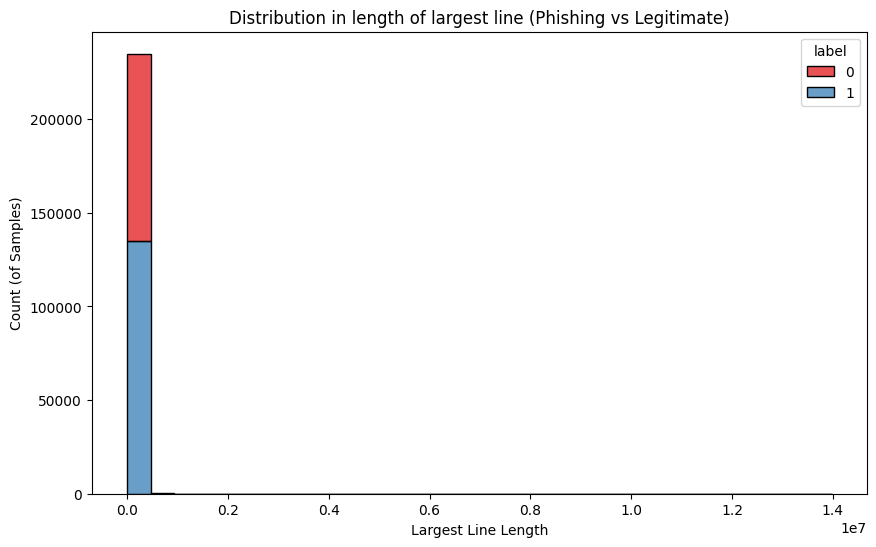

In [5]:
# Distribution in Lines of Code based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='LineOfCode', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Lines of Code (Phishing vs Legitimate)')
plt.xlabel('Lines of Code')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of Popups based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfPopup', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Number of Popups (Phishing vs Legitimate)')
plt.xlabel('Number of Popups')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of iFrames based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfiFrame', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Number of iFrames (Phishing vs Legitimate)')
plt.xlabel('Number of iFrames')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of images based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfImage', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Number of Images (Phishing vs Legitimate)')
plt.xlabel('Number of Images')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of CSS based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfCSS', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Number of CSS (Phishing vs Legitimate)')
plt.xlabel('Number of CSS')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of JS based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfJS', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in Number of JS (Phishing vs Legitimate)')
plt.xlabel('Number of JS')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of Self References based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfSelfRef', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in No. of Self References (Phishing vs Legitimate)')
plt.xlabel('No. of Self References')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of Empty References based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfEmptyRef', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in No. of Empty References (Phishing vs Legitimate)')
plt.xlabel('No. of Empty References')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in No. of External References based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='NoOfExternalRef', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in No. of External References (Phishing vs Legitimate)')
plt.xlabel('No. of External References')
plt.ylabel('Count (of Samples)')
plt.show()

# Distribution in Largest Line Length based on Label
plt.figure(figsize=(10,6))
sns.histplot(df, x='LargestLineLength', hue='label', multiple='stack', bins=30, palette='Set1')
plt.title('Distribution in length of largest line (Phishing vs Legitimate)')
plt.xlabel('Largest Line Length')
plt.ylabel('Count (of Samples)')
plt.show()

Based on the above analysis, filtering out the outliers for each feature.

In [6]:
filtered_data = filtered_data[filtered_data['TLDLength'] < 5]
filtered_data = filtered_data[filtered_data['NoOfSubDomain'] < 5]

filtered_data = filtered_data[filtered_data['NoOfObfuscatedChar'] < 1]
filtered_data = filtered_data[filtered_data['NoOfLettersInURL'] < 200]
filtered_data = filtered_data[filtered_data['NoOfDegitsInURL'] < 50]
filtered_data = filtered_data[filtered_data['NoOfEqualsInURL'] < 5]
filtered_data = filtered_data[filtered_data['NoOfAmpersandInURL'] < 5]
filtered_data = filtered_data[filtered_data['NoOfOtherSpecialCharsInURL'] < 20]

filtered_data = filtered_data[filtered_data['LineOfCode'] < 20000]
filtered_data = filtered_data[filtered_data['NoOfPopup'] < 20]
filtered_data = filtered_data[filtered_data['NoOfiFrame'] < 50]
filtered_data = filtered_data[filtered_data['NoOfImage'] < 200]
filtered_data = filtered_data[filtered_data['NoOfCSS'] < 500]
filtered_data = filtered_data[filtered_data['NoOfJS'] < 100]

filtered_data = filtered_data[filtered_data['NoOfSelfRef'] < 500]
filtered_data = filtered_data[filtered_data['NoOfEmptyRef'] < 100]
filtered_data = filtered_data[filtered_data['NoOfExternalRef'] < 500]

filtered_data = filtered_data[filtered_data['LargestLineLength'] < 1e5]

filtered_data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.0,220160.0,220160.0,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000
mean,31.671880,20.962287,0.000877,79.702328,0.852168,0.264042,0.056071,2.730973,1.150995,0.0,0.0,0.0,17.397720,0.512427,1.273378,0.026305,0.025291,0.019091,0.000736,2.129370,0.063006,0.779120,948.182985,4983.838508,0.864539,50.777496,52.758543,0.362782,0.267524,0.625368,0.127971,0.040952,0.441583,0.127067,1.412327,0.044086,0.458344,0.405546,0.371017,0.091461,0.117197,0.225254,0.021716,0.484702,19.963617,6.077634,10.028697,54.826090,1.762318,42.608875,0.577716
std,16.421752,7.487491,0.029595,27.435906,0.208475,0.251318,0.010377,0.501157,0.568899,0.0,0.0,0.0,13.321252,0.121298,3.898868,0.068222,0.230619,0.142088,0.043148,1.954012,0.031862,0.414841,1566.775640,9394.407897,0.342216,49.667462,49.564601,0.480804,0.442669,0.484029,0.334058,0.198180,0.496577,0.819161,3.775988,0.205287,0.498263,0.490999,0.483078,0.288264,0.321655,0.417751,0.145755,0.499767,29.522680,10.749784,13.139550,80.325145,5.587083,70.210788,0.493924
min,13.000000,4.000000,0.000000,3.266125,0.000000,0.000000,0.001083,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,59.142857,0.692308,0.007505,0.051354,2.000000,1.000000,0.0,0.0,0.0,10.000000,0.435000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.038000,1.000000,20.000000,182.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.058147,3.000000,1.000000,0.0,0.0,0.0,14.000000,0.517000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.050000,1.000000,421.000000,986.000000,1.000000,85.714286,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2.000000,6.000000,13.000000,0.000000,10.000000,1.000000
75%,33.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062973,3.000000,1.000000,0.0,0.0,0.0,20.000000,0.594000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.083000,1.000000,1210.000000,8047.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,0.000

Removing Redundant Features (By Looking at the Correlation Heatmap) ->

We look at the pairwise correlation between features, and remove one of each pair, as they basically convey the same information and so, one of them is always redundant.

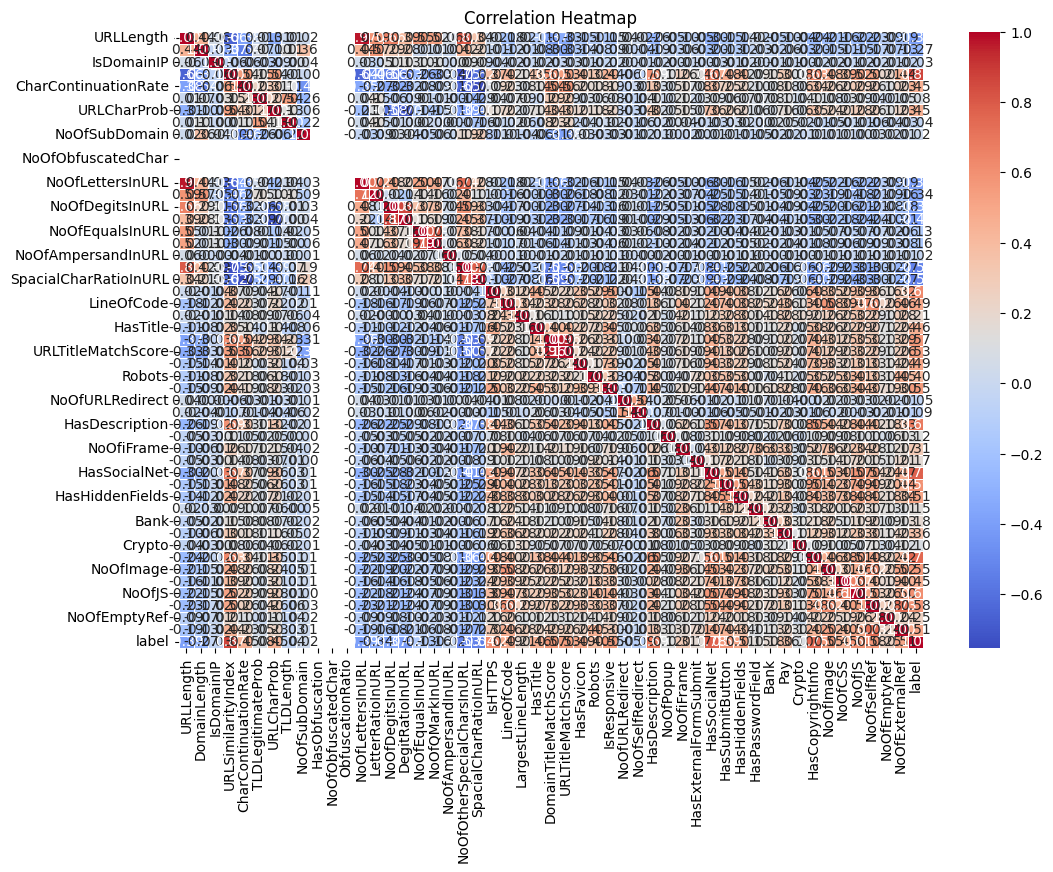

In [7]:
# Dropping URL, Domain, TLD and Title from correlation heatmap as they aren't numerical.
numerical_data = filtered_data.drop(columns = ['URL', 'TLD', 'Domain', 'Title'])

# Plotting the correlation heatmap.
correlation_matrix = numerical_data.corr()

# Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
threshold = 0.5 # Threshold above which we say that 2 features are highly correlated and 1 of them needs to be removed.

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            print(f"{correlation_matrix.columns[i]}, {correlation_matrix.columns[j]}")

URLSimilarityIndex, URLLength
CharContinuationRate, DomainLength
CharContinuationRate, URLSimilarityIndex
URLCharProb, URLSimilarityIndex
TLDLength, TLDLegitimateProb
NoOfLettersInURL, URLLength
NoOfLettersInURL, URLSimilarityIndex
LetterRatioInURL, URLLength
LetterRatioInURL, DomainLength
LetterRatioInURL, NoOfLettersInURL
NoOfDegitsInURL, URLLength
NoOfDegitsInURL, URLSimilarityIndex
NoOfDegitsInURL, URLCharProb
DegitRatioInURL, URLSimilarityIndex
DegitRatioInURL, URLCharProb
DegitRatioInURL, NoOfDegitsInURL
NoOfEqualsInURL, URLLength
NoOfEqualsInURL, NoOfLettersInURL
NoOfQMarkInURL, URLLength
NoOfQMarkInURL, NoOfEqualsInURL
NoOfOtherSpecialCharsInURL, URLLength
NoOfOtherSpecialCharsInURL, URLSimilarityIndex
NoOfOtherSpecialCharsInURL, CharContinuationRate
NoOfOtherSpecialCharsInURL, NoOfLettersInURL
NoOfOtherSpecialCharsInURL, NoOfDegitsInURL
SpacialCharRatioInURL, URLSimilarityIndex
SpacialCharRatioInURL, CharContinuationRate
SpacialCharRatioInURL, NoOfOtherSpecialCharsInURL
Domain

Based on the above info, we remove the following columns:-

URLSimilarityIndex, CharContinuationRate, LetterRatioInURL, URLCharProb, DegitRatioInURL, SpacialCharRatioInURL, DomainTitleMatchScore, HasSocialNet, HasSubmitButton, HasCopyrightInfo, NoOfImage, NofOfJS, NoOfSelfRef, NoOfExternalRef, TLDLegitimateProb

Also dropping HasObfuscation, NoOfObfuscatedChar and ObfuscationRatio since they are all 0 after the initial pre-processing.

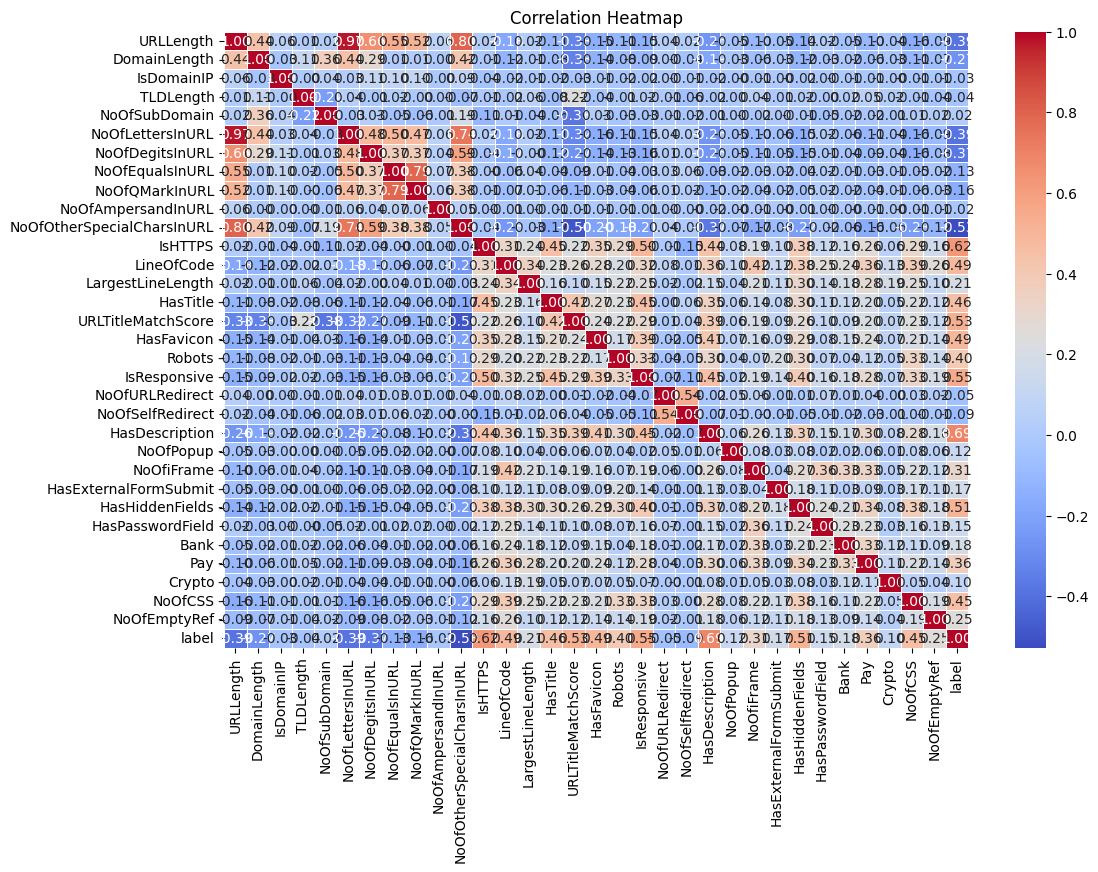

In [9]:
dropped_columns = ["URLSimilarityIndex", "CharContinuationRate", "LetterRatioInURL", "URLCharProb", "DegitRatioInURL", "SpacialCharRatioInURL",
                   "DomainTitleMatchScore", "HasSocialNet", "HasSubmitButton", "HasCopyrightInfo", "NoOfImage", "NoOfJS", "NoOfSelfRef", 
                   "NoOfExternalRef", "HasObfuscation", "NoOfObfuscatedChar", "ObfuscationRatio", "TLDLegitimateProb"]

numerical_data = filtered_data.drop(columns = ['URL', 'TLD', 'Domain', 'Title'])
numerical_data = numerical_data.drop(columns = dropped_columns)

# Plotting the correlation heatmap.
correlation_matrix = numerical_data.corr()

# Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
pre_proc_data = filtered_data.drop(columns = dropped_columns)
pre_proc_data.describe()

,URLLength,DomainLength,IsDomainIP,TLDLength,NoOfSubDomain,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfCSS,NoOfEmptyRef,label
count,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000,220160.000000
mean,31.671880,20.962287,0.000877,2.730973,1.150995,17.397720,1.273378,0.025291,0.019091,0.000736,2.129370,0.779120,948.182985,4983.838508,0.864539,52.758543,0.362782,0.267524,0.625368,0.127971,0.040952,0.441583,0.127067,1.412327,0.044086,0.371017,0.091461,0.117197,0.225254,0.021716,6.077634,1.762318,0.577716
std,16.421752,7.487491,0.029595,0.501157,0.568899,13.321252,3.898868,0.230619,0.142088,0.043148,1.954012,0.414841,1566.775640,9394.407897,0.342216,49.564601,0.480804,0.442669,0.484029,0.334058,0.198180,0.496577,0.819161,3.775988,0.205287,0.483078,0.288264,0.321655,0.417751,0.145755,10.749784,5.587083,0.493924
min,13.000000,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,2.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,182.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,20.000000,0.000000,3.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,421.000000,986.000000,1.000000,100.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,33.000000,24.000000,0.000000,3.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1210.000000,8047.000000,1.000000,100.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000
max,287.000000,59.000000,1.000000,4.000000,4.000000,198.000000,49.000000,4.000000,4.000000,4.000000,19.000000,1.000000,19744.000000,99885.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.000000,99.000000,1.000000


Balancing the Datasets by Keeping Equal Counts of Either Class.

In [11]:
counts = pre_proc_data['label'].value_counts()
print(counts)

label
1    127190
0     92970
Name: count, dtype: int64


In [12]:
min_count = pre_proc_data['label'].value_counts().min()

undersampled_data = pre_proc_data.groupby('label').sample(n = min_count, random_state = 42)
undersampled_data = undersampled_data.reset_index(drop = True)
undersampled_data.head()

counts = undersampled_data['label'].value_counts()
print(counts)

label
0    92970
1    92970
Name: count, dtype: int64


Normalizing the Numerical Data and Label Encoding Discrete Features

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaled_columns = numerical_data.columns.to_list()
scaled_columns.remove('label')

# Label encoding TLD
label_encoder = LabelEncoder()
undersampled_data['TLD'] = label_encoder.fit_transform(undersampled_data['TLD'])

# Saving non-normalized data to CSV File.
undersampled_data.to_csv('../Datasets/data_without_normalization.csv', index = False)

In [14]:
normalizable_columns = scaled_columns.copy()

# Removing the discrete data, as we don't want them to be normalized.
columns_to_remove = ['IsDomainIP', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit',
                     'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto']

for i in columns_to_remove:
    normalizable_columns.remove(i)

# Normalizing numerical data
scaler = StandardScaler()
undersampled_data[normalizable_columns] = scaler.fit_transform(undersampled_data[normalizable_columns])

undersampled_data.describe()

,URLLength,DomainLength,IsDomainIP,TLD,TLDLength,NoOfSubDomain,NoOfLettersInURL,NoOfDegitsInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,NoOfCSS,NoOfEmptyRef,label
count,1.859400e+05,1.859400e+05,185940.000000,185940.000000,1.859400e+05,1.859400e+05,1.859400e+05,1.859400e+05,1.859400e+05,1.859400e+05,1.859400e+05,1.859400e+05,185940.000000,1.859400e+05,1.859400e+05,185940.000000,1.859400e+05,185940.000000,1.859400e+05,185940.000000,1.859400e+05,1.859400e+05,185940.000000,1.859400e+05,1.859400e+05,185940.000000,185940.000000,185940.000000,185940.000000,185940.000000,185940.000000,1.859400e+05,1.859400e+05,185940.000000
mean,-1.027180e-16,-3.913067e-17,0.001038,233.209299,4.072036e-16,6.251737e-17,8.559835e-17,6.358735e-17,2.262242e-17,7.948418e-18,-1.834250e-18,1.222834e-17,0.738469,-9.293535e-17,4.157634e-17,0.839852,-1.711967e-17,0.325411,-1.125007e-16,0.583349,-2.904230e-17,7.887277e-17,0.388351,1.100550e-17,-1.051637e-16,0.038830,0.331645,0.084624,0.108756,0.202167,0.019442,8.559835e-17,-8.315268e-17,0.500000
std,1.000003e+00,1.000003e+00,0.032201,92.515800,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.439469,1.000003e+00,1.000003e+00,0.366745,1.000003e+00,0.468530,1.000003e+00,0.493005,1.000003e+00,1.000003e+00,0.487376,1.000003e+00,1.000003e+00,0.193189,0.470805,0.278322,0.311333,0.401617,0.138072,1.000003e+00,1.000003e+00,0.500001
min,-1.118964e+00,-2.202706e+00,0.000000,0.000000,-1.449374e+00,-1.934269e+00,-1.282165e+00,-3.565857e-01,-1.194623e-01,-1.464439e-01,-1.855716e-02,-1.104528e+00,0.000000,-5.548430e-01,-4.956445e-01,0.000000,-9.799625e-01,0.000000,-5.614577e-01,0.000000,-3.879863e-01,-2.142690e-01,0.000000,-1.452875e-01,-3.468638e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.195924e-01,-2.920892e-01,0.000000
25%,-4.928884e-01,-6.719531e-01,0.000000,179.000000,-1.449374e+00,-2.503272e-01,-5.779316e-01,-3.565857e-01,-1.194623e-01,-1.464439e-01,-1.855716e-02,-6.225404e-01,0.000000,-5.487986e-01,-4.846697e-01,1.000000,-9.799625e-01,0.000000,-5.614577e-01,0.000000,-3.879863e-01,-2.142690e-01,0.000000,-1.452875e-01,-3.468638e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.195924e-01,-2.920892e-01,0.000000
50%,-2.652244e-01,-1.617022e-01,0.000000,179.000000,5.248010e-01,-2.503272e-01,-2.258149e-01,-3.565857e-01,-1.194623e-01,-1.464439e-01,-1.855716e-02,-6.225404e-01,1.000000,-3.862716e-01,-4.099767e-01,1.000000,-9.206973e-01,0.000000,-5.614577e-01,1.000000,-3.879863e-01,-2.142690e-01,0.000000,-1.452875e-01,-3.468638e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.216306e-01,-2.920892e-01,0.500000
75%,1.331875e-01,4.761113e-01,0.000000,309.000000,5.248010e-01,-2.503272e-01,1.967252e-01,-3.565857e-01,-1.194623e-01,-1.464439e-01,-1.855716e-02,3.414352e-01,1.000000,1.483214e-01,2.274709e-01,1.000000,1.035056e+00,1.000000,-5.614577e-01,1.000000,-3.879863e-01,-2.142690e-01,1.000000,-1.452875e-01,-6.643728e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.817808e-02,-1.027333e-01,1.000000
max,1.447602e+01,4.813243e+00,1.000000,472.000000,2.498976e+00,4.801499e+00,1.266166e+01,1.130685e+01,1.583802e+01,2.576817e+01,8.517941e+01,8.053240e+00,1.000000,1.269111e+01,1.014496e+01,1.000000,1.035056e+00,1.000000,1.781078e+00,1.000000,2.577411e+00,4.667031e+00,1.000000,2.476278e+01,1.339403e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.062434e+01,1.845415e+01,1.000000


In [15]:
# Saving normalized data to CSV File.
undersampled_data.to_csv('../Datasets/data_with_normalization.csv', index = False)